# Six-Day Clock
This project undertakes to reproduce the results of Gerald Schroeder on the lookback time to the big bang using a clock that runs slower in the past in proportion to the scale factor of the universe, where scale factor a = 1/(1 + z), z being the red shift.
To track the scale factor of the universe back in time, I rely on an approximate formula that gives a good fit to data on lookback time vs redshift between in the redshift range from 0.2 to 20.

$T = \frac{0.589 + 13.87 Z^{1.25}}{ 0.852 + Z^{1.25}} 10^{9}$ 

For an up-to-date description of Schroeder's picture, see Sarah Salviander, The Six Days of Genesis (1996).

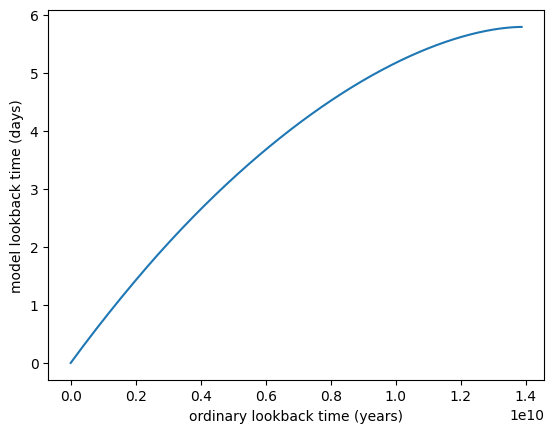

In [60]:
import numpy as np
import matplotlib.pyplot as plt

H0 = 1 / 13e9 # Hubble constant in 1/years

def lookback_years(z):
    """
    Computes the lookback time  of the universe as a function of redshift,
    said to be a good description between z=0.2 and z=20.
    """
    if z < 0.2:
        years = z / H0
    else:
        years = ( 0.589 + 13.87 * z**1.25 ) / ( 0.852 + z**1.25) * 1e9
    return years

def a_scale(z):
    """
    Computes the scale factor of the universe as a function of redshift.
    """
    return 1/(1+z)

zlist = np.concatenate((np.arange(0,10,0.01), np.arange(10,100,0.1), np.arange(100,1100,1)))
t = [lookback_years(z) for z in zlist]
a = [a_scale(z) for z in zlist]
tdays = [0 for z in zlist]
FF = 1 / 365 / 1.3e9  # free parameter in the model, needed to get the CMB to happen in day 1
for i in range(len(zlist)):
    if i > 0:
        dt = (t[i] - t[i-1]) * a[i] * FF
        tdays[i] = tdays[i-1] + dt * 365
    if i % 1 == -1:
        print(f"z={zlist[i]}: t={t[i]*1e-9}, a={a[i]}, tdays={tdays[i]}")
plt.plot(t, tdays)
plt.xlabel("ordinary lookback time (years)")
plt.ylabel("model lookback time (days)")
plt.show()